# 1차시: Neural Network 기초
#### Import

In [1]:
!pip install --upgrade git+https://github.com/dAiv-CNU/torchdaiv.git

  Cloning https://github.com/dAiv-CNU/torchdaiv.git to /tmp/pip-req-build-wcii08jr
  Running command git clone --filter=blob:none --quiet https://github.com/dAiv-CNU/torchdaiv.git /tmp/pip-req-build-wcii08jr
  Resolved https://github.com/dAiv-CNU/torchdaiv.git to commit 20d31332218bbd1c73bf447ce50b2dabebaf9a28
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchdaiv import datasets
from torchdaiv.lectures.emotion import nn
from torchdaiv.lectures.emotion.util import vocabulary, transforms

from rich.traceback import install
install(show_locals=True)

<bound method InteractiveShell.excepthook of <google.colab._shell.Shell object at 0x7b0b31a481f0>>

#### Load Dataset

In [3]:
# 사전 생성기 초기화, 데이터셋 로드
vocab, to_vocab = vocabulary.vocabulary_creator()
train_dataset = datasets.EmotionDataset("./data", download=True, train=True, sentiment=False, transform=to_vocab)
test_dataset = datasets.EmotionDataset("./data", download=True, train=False, sentiment=False, transform=to_vocab)

Using downloaded and verified file: ./data/download.tar
Extracting ./data/download.tar to ./data
Extracting files recursively...


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Extraction completed.
Using downloaded and verified file: ./data/download.tar
Extracting ./data/download.tar to ./data
Extracting files recursively...


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Extraction completed.


In [4]:
# 데이터셋 형태 확인
for i, (text, emotion) in zip(range(20), train_dataset):
    print(f"{i}: {text} -> {emotion}")

0: 제품은 품질이 맘에드는데 와펜로고 박음질이 잘안되어있는옷이 2벌입니다.ㅜㅜ 떼어내면 자국이남을것같고... 다른분 배송시에는 신경을써주셔야할것 같습니다. -> 중도
1: 따뜻하게 잘 입고 있는데 살짝 마감처리가 아쉽기는하네요. -> 중도
2: 품질도 좋고 가격도 좋아요! 티셔츠 안쪽 소재가 기모로 되어 있더라구요 두께감도 적당하게 두툼하고 부드럽고 따뜻합니다. 색감도 촌스럽지 않고 너무 예뻐요..! -> 긍정
3: 디자인 멋있습니다.많이 추울때 입고다녀도 따듯하고 스타일삽니다.가성비 좋음.. -> 긍정
4: 두어번기계세탁에 보풀은 아직까진 안일어나네요.안쪽기모도 부드러우편이고  더 추워봐야알겠지만  부쩍추워진 요사이 막입고 다니기 좋다고하네요. 더러움도 덜타는 색감들이고, 다만 겉감이 조금 억센느낌이라고해야할까...  제옷같았음 저는 겉감 감촉때문에라도 안입었을듯 -> 중도
5: 사이즈 적당함 어떤건 생각보다 크거나 작은데... 감촉은 부드러운편 따끔거리지 않음 입고 다녀보니 기모라 따스하지만 바람은 솔솔 들어온다 색상이 다양해서 지겹지는 않을듯 한 겨울을 잘 보낼수 있겠응 -> 긍정
6: 기대한 만큼 딱 만족스럽네요..재질,색상 모두 맘에 듦.  찬바람 불기 전에 미리 구입했는데, 잘산것 같음. -> 긍정
7: 이 가격에 5가지를 살 수 있다는게 믿겨 지지않아요. 재질도 좋고 가격도 싸고 너무 맘에 들어요. -> 긍정
8: 하나 구입하고 너무 좋아서 추가 구입한 제품이고요 기모 살짝 들어가고 얇아서 옷 받쳐입기 좋은 상품입니다. 물건 다 빠져서 이것도 간신히 샀네요. -> 긍정
9: 배송은 조금 느렸지만 제품받고 바로 착용해봤는데 핏은 괜찮습니다. 목도 살짝 올라와서 추위 덜하고요. 가을 실내용으로는 적절하고 몸 좀 움직이면 더워서 지퍼내리면 되니 좋습니다. -> 긍정
10: 간절기에 입기 딱 좋아요 추울땐 이너로 입기에도 부담 앖을듯합니다 -> 긍정
11: 배송빠르고 옷도착용해보니편하고좋아요~요즘계절에입기딱맞는거같아요~~ -> 긍정
12: 1장 빼고 가

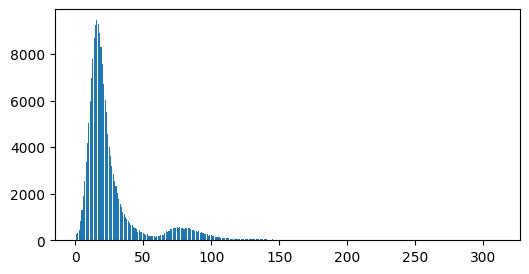

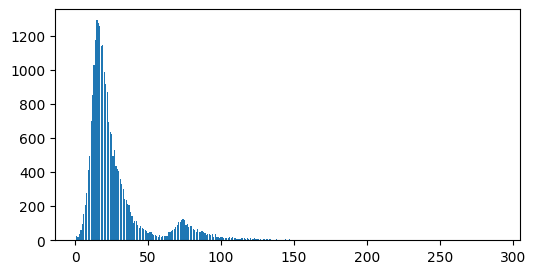

In [5]:
# vocab 생성 후 데이터셋을 텐서로 변환
train_dataset.transform(
    transform=transforms.to_tensor(vocabulary=vocab, show_graph=True),
    target_transform=transforms.label_to_tensor
)
test_dataset.transform(
    transform=transforms.to_tensor(vocabulary=vocab, show_graph=True),
    target_transform=transforms.label_to_tensor
)

In [6]:
# 텐서 크기 조정
max_token_size = 80
train_dataset.transform(transform=transforms.size_to(max_token_size))
test_dataset.transform(transform=transforms.size_to(max_token_size))

In [7]:
# 변환된 데이터 형태 확인
for i, (text, emotion) in zip(range(20), train_dataset):
    print(f"{i}: {text} -> {emotion}")

0: tensor([0.9334, 0.9423, 0.1056, 0.0000, 0.5633, 0.0000, 0.0000, 0.7512, 0.4086,
        0.0489, 0.0000, 0.7512, 0.7512, 0.7512, 0.7334, 0.0000, 0.0000, 0.2988,
        0.7512, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]) -> tensor([0., 1., 0.])
1: tensor([0.8183, 0.0706, 0.3031, 0.1269, 0.3624, 0.4118, 0.0000, 0.7512, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0

#### DataLoader

In [8]:
batch_size = len(train_dataset) // 50

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset)//20)

#### Model Definition

In [9]:
# 모델 정의
class MyModel(nn.Module):
    def __init__(self, input_max_token: int, hidden_size: int):
        super(MyModel, self).__init__()
        self.input = nn.Linear(input_max_token, hidden_size)
        self.fc1 = nn.Linear(hidden_size, hidden_size // 10)
        self.fc2 = nn.Linear(hidden_size // 10, hidden_size // 20)
        self.fc3 = nn.Linear(hidden_size // 20, 3)

    def forward(self, x):
        h1 = F.relu(self.input(x))
        h2 = F.relu(self.fc1(h1))
        h3 = F.relu(self.fc2(h2))
        out = self.fc3(h3)
        return out

In [10]:
# 하이퍼 파라미터 설정
epochs = 20
learning_rate = 0.05
hidden_layer_size = 4096

In [11]:
# 모델 생성 및 데이터 로더 지정
model = MyModel(input_max_token=max_token_size, hidden_size=hidden_layer_size)
model.set_dataloader(train_dataloader, test_dataloader)
model

MyModel(
  (input): Linear(in_features=80, out_features=4096, bias=True)
  (fc1): Linear(in_features=4096, out_features=409, bias=True)
  (fc2): Linear(in_features=409, out_features=204, bias=True)
  (fc3): Linear(in_features=204, out_features=3, bias=True)
)

In [12]:
# Use CUDA driver if available
if torch.cuda.is_available():
    model.to("cuda", non_blocking=True)
print("Use Device:", model.device.upper())

Use Device: CUDA


#### Training

In [13]:
# Train Dataset에 대해서 학습 시작
model.train(epochs=epochs, optimizer_init=True, lr=learning_rate)

Epoch 1:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [1/20], Step: [51/51], Accuracy: 64.013685%, Loss: 45.48690722


Epoch 2:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [2/20], Step: [51/51], Accuracy: 65.264233%, Loss: 0.88148442


Epoch 3:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [3/20], Step: [51/51], Accuracy: 65.264232%, Loss: 0.87947033


Epoch 4:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [4/20], Step: [51/51], Accuracy: 65.142753%, Loss: 0.88161305


Epoch 5:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [5/20], Step: [51/51], Accuracy: 65.385712%, Loss: 0.87705054


Epoch 6:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [6/20], Step: [51/51], Accuracy: 65.203493%, Loss: 0.87898420


Epoch 7:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [7/20], Step: [51/51], Accuracy: 65.385713%, Loss: 0.87664023


Epoch 8:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [8/20], Step: [51/51], Accuracy: 65.203493%, Loss: 0.87887441


Epoch 9:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [9/20], Step: [51/51], Accuracy: 65.507192%, Loss: 0.87515996


Epoch 10:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [10/20], Step: [51/51], Accuracy: 65.507192%, Loss: 0.87545740


Epoch 11:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [11/20], Step: [51/51], Accuracy: 65.324973%, Loss: 0.87628744


Epoch 12:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [12/20], Step: [51/51], Accuracy: 65.142753%, Loss: 0.88095952


Epoch 13:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [13/20], Step: [51/51], Accuracy: 65.203493%, Loss: 0.87849016


Epoch 14:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [14/20], Step: [51/51], Accuracy: 65.446453%, Loss: 0.87543028


Epoch 15:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [15/20], Step: [51/51], Accuracy: 65.264233%, Loss: 0.87884313


Epoch 16:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [16/20], Step: [51/51], Accuracy: 65.203493%, Loss: 0.87918215


Epoch 17:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [17/20], Step: [51/51], Accuracy: 65.385712%, Loss: 0.87766977


Epoch 18:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [18/20], Step: [51/51], Accuracy: 65.507192%, Loss: 0.87517687


Epoch 19:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [19/20], Step: [51/51], Accuracy: 65.324973%, Loss: 0.87788557


Epoch 20:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch [20/20], Step: [51/51], Accuracy: 65.264232%, Loss: 0.87797148


#### Evaluation

In [14]:
# Test Dataset에 대해서 평가 진행
model.evaluate()

Performance Test:   0%|          | 0/21 [00:00<?, ?it/s]

Accuracy: 62.017990%, Loss: 0.92098815


#### Prediction

In [15]:
# 토큰화 및 텐서 변환 후 직접 입력한 문장 분류
transform_sequence = [
    transforms.to_tensor(vocabulary=vocab, show_graph=False),
    transforms.size_to(max_token_size)
]

In [16]:
model.pipeline(message="안녕하세요! 반갑습니다!", transform=transform_sequence)

긍정

In [17]:
model.pipeline(message="이건 좀 아닌거 같음", transform=transform_sequence)

긍정

In [18]:
model.pipeline(message="못 생겼음", transform=transform_sequence)

긍정

In [19]:
model.pipeline(message="잘 받았습니다.", transform=transform_sequence)

긍정

In [20]:
model.pipeline(message="잘 모르겠네요...", transform=transform_sequence)

긍정

In [21]:
model.pipeline(message="색상별로 사이즈가 너무 다르네요 반품귀찮아서 그냥 대충 입으려구요  여름에입긴 더울거같네요 봄.가을용입니다", transform=transform_sequence)

긍정

In [22]:
model.pipeline(message="기대를 안했는데  바지가 생각보다  착용감 편하고 가볍네요 근데 한가지 허리밴드부분이 너무  널어서 좀~  쪼금안 덜  넓었으면 좋겠어요", transform=transform_sequence)

긍정